# Model Evaluation
In this notebook, i will evaluate the performance of models using three feature selection techniques:

1. All Features
2. SelectKBest Features

### 1. All Features Evaluation Metrics  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load all features metrics data
df_all_features = pd.read_csv('../data/metrics_features_all.csv')
df_all_features

,Model,Accuracy,Precision,Recall,F1 Score,Best Parameters
0,Logistic_Regression,0.973684,0.976190,0.953488,0.964706,"{'C': 1.623776739188721, 'penalty': 'l2'}"
1,SVM,0.973684,0.976190,0.953488,0.964706,"{'C': 0.23357214690901212, 'kernel': 'linear'}"
2,Decision_Tree,0.947368,0.974359,0.883721,0.926829,"{'criterion': 'entropy', 'max_depth': 4}"
3,Random_Forest,0.964912,0.975610,0.930233,0.952381,"{'max_depth': None, 'n_estimators': 200}"


### 1.1 Bar-chart for All Features Evaluation Metrics 

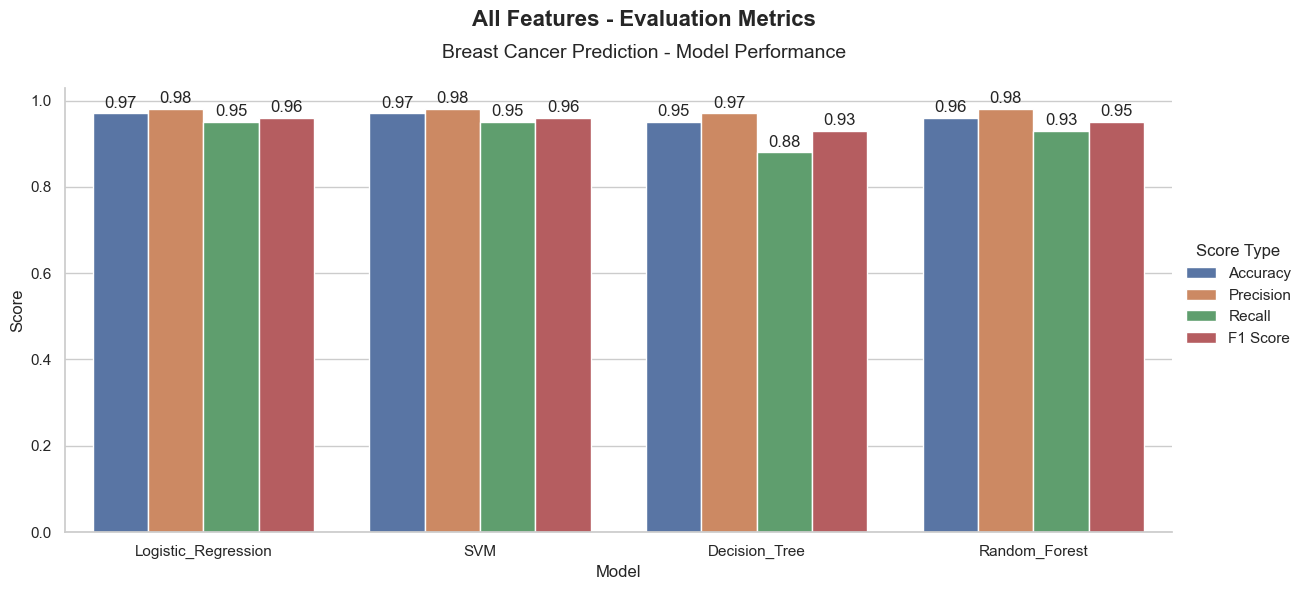

In [2]:
# Unpivot dataframe to group scores by model and score type
df_melt = pd.melt(df_all_features, id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                  var_name='Score Type', value_name='Score')

# Round scores to two decimal places
df_melt['Score'] = df_melt['Score'].apply(lambda x: round(x, 2))


# Plot scores using seaborn
sns.set(style="whitegrid")
g = sns.catplot(x='Model', y='Score', hue='Score Type', kind='bar', data=df_melt, height=6, aspect=2)

# Add values to each bar
ax = g.facet_axis(0, 0)
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=12, padding=2)

# Set plot title and subtitle
plt.subplots_adjust(top=0.9)
g.fig.suptitle('All Features - Evaluation Metrics', fontsize=16, fontweight='bold')
g.fig.subplots_adjust(top=0.85)
g.fig.text(0.5, 0.9, 'Breast Cancer Prediction - Model Performance', ha='center', fontsize=14)

plt.show()

# Save the plot
g.savefig('../images/all_features_metrics.png', dpi=300, bbox_inches='tight')

### 2 SelectKBest Evaluation Metrics

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_selectkbest = pd.read_csv('../data/metrics_features_SelectKBest.csv')
df_selectkbest

,Model,Accuracy,Precision,Recall,F1 Score,Best Parameters
0,Logistic_Regression,0.982456,0.976744,0.976744,0.976744,"{'C': 11.288378916846883, 'penalty': 'l2'}"
1,SVM,0.982456,0.976744,0.976744,0.976744,"{'C': 1.623776739188721, 'kernel': 'linear'}"
2,Decision_Tree,0.938596,0.950000,0.883721,0.915663,"{'criterion': 'gini', 'max_depth': 4}"
3,Random_Forest,0.956140,0.952381,0.930233,0.941176,"{'max_depth': 6, 'n_estimators': 50}"


### 2.1 Bar-chart for SelectKBest Evaluation Metrics 

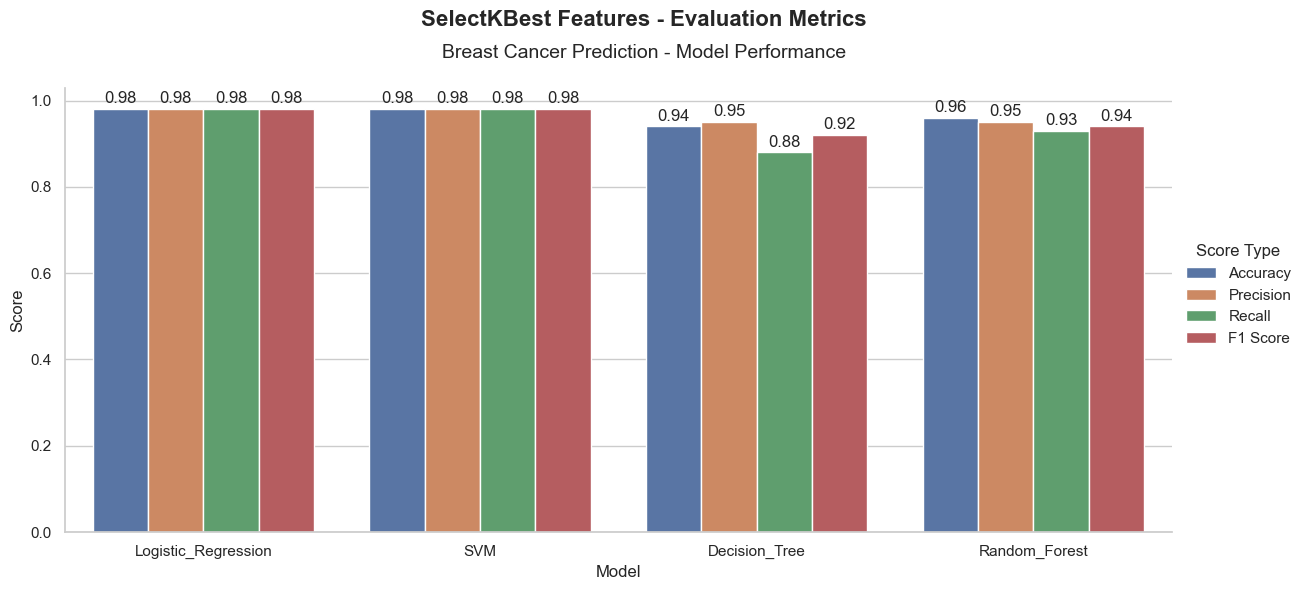

In [4]:
# Unpivot dataframe to group scores by model and score type
df_melt = pd.melt(df_selectkbest, id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                  var_name='Score Type', value_name='Score')

# Round scores to two decimal places
df_melt['Score'] = df_melt['Score'].apply(lambda x: round(x, 2))


# Plot scores using seaborn
sns.set(style="whitegrid")
g = sns.catplot(x='Model', y='Score', hue='Score Type', kind='bar', data=df_melt, height=6, aspect=2)

# Add values to each bar
ax = g.facet_axis(0, 0)
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=12, padding=2)

# Set plot title and subtitle
plt.subplots_adjust(top=0.9)
g.fig.suptitle('SelectKBest Features - Evaluation Metrics', fontsize=16, fontweight='bold')
g.fig.subplots_adjust(top=0.85)
g.fig.text(0.5, 0.9, 'Breast Cancer Prediction - Model Performance', ha='center', fontsize=14)

plt.show()

# Save the plot
g.savefig('../images/selectkbest_features_metrics.png', dpi=300, bbox_inches='tight')

## Merging all metcis file to one Excel file 

In [5]:
import pandas as pd

# Read the CSV files
df_all = pd.read_csv('../data/metrics_features_all.csv')
df_selectkbest = pd.read_csv('../data/metrics_features_SelectKBest.csv')

# Merge the dataframes
df_merge = pd.concat([df_all, df_selectkbest], axis=0)

# Save the merged dataframe as an Excel file
df_merge.to_excel('../data/2_metrics_merged.xlsx', index=False)
